In [1]:
import torch
import testt as t
import preprocess as p

In [2]:
data_dir = './dataset/test'
batch_size = 32
img_size = 64

#Architecture
out_1 = 64 
out_2 = 128 
out_3 = 256 
out_4 = 512

In [3]:
#Lista de modelos y sus clases
models = [("Resultados/Models/Model1_3C_1_DA.pth", "3C"), ("Resultados/Models/Model1_3C_1_NO.pth", "3C"), ("Resultados/Models/Model1_3C_2_DA.pth", "3C"),
          ("Resultados/Models/Model1_3C_2_NO.pth", "3C"), ("Resultados/Models/Model1_3C_3_DA.pth", "3C"), ("Resultados/Models/Model1_3C_3_NO.pth", "3C"),
          ("Resultados/Models/Model2_3C_3_NO.pth", "3C"), ("Resultados/Models/Model1_4C_1_DA.pth", "4C"), ("Resultados/Models/Model1_4C_1_NO.pth", "4C"),
          ("Resultados/Models/Model1_4C_2_DA.pth", "4C"), ("Resultados/Models/Model1_4C_2_NO.pth", "4C"), ("Resultados/Models/Model1_4C_3_DA.pth", "4C"),
          ("Resultados/Models/Model1_4C_3_NO.pth", "4C"), ("Resultados/Models/Model2_4C_3_DA.pth", "4C"), ("Resultados/Models/Model1_B3C_1_DA.pth", "B3C"),
          ("Resultados/Models/Model1_B3C_1_NO.pth", "B3C"), ("Resultados/Models/Model1_B3C_2_DA.pth", "B3C"), ("Resultados/Models/Model1_B3C_2_NO.pth", "B3C"),
          ("Resultados/Models/Model1_B3C_3_DA.pth", "B3C"), ("Resultados/Models/Model1_B3C_3_NO.pth", "B3C")] #7, 7, 6 (7 modelos 3C, 7 modelos 4C y 6 modelos B3C)

#Mostrar la lista
print("Lista models:")
for model_path, model_class in models:
    print(f"Modelo: {model_class}, Ruta: {model_path}")

Lista models:
Modelo: 3C, Ruta: Resultados/Models/Model1_3C_1_DA.pth
Modelo: 3C, Ruta: Resultados/Models/Model1_3C_1_NO.pth
Modelo: 3C, Ruta: Resultados/Models/Model1_3C_2_DA.pth
Modelo: 3C, Ruta: Resultados/Models/Model1_3C_2_NO.pth
Modelo: 3C, Ruta: Resultados/Models/Model1_3C_3_DA.pth
Modelo: 3C, Ruta: Resultados/Models/Model1_3C_3_NO.pth
Modelo: 3C, Ruta: Resultados/Models/Model2_3C_3_NO.pth
Modelo: 4C, Ruta: Resultados/Models/Model1_4C_1_DA.pth
Modelo: 4C, Ruta: Resultados/Models/Model1_4C_1_NO.pth
Modelo: 4C, Ruta: Resultados/Models/Model1_4C_2_DA.pth
Modelo: 4C, Ruta: Resultados/Models/Model1_4C_2_NO.pth
Modelo: 4C, Ruta: Resultados/Models/Model1_4C_3_DA.pth
Modelo: 4C, Ruta: Resultados/Models/Model1_4C_3_NO.pth
Modelo: 4C, Ruta: Resultados/Models/Model2_4C_3_DA.pth
Modelo: B3C, Ruta: Resultados/Models/Model1_B3C_1_DA.pth
Modelo: B3C, Ruta: Resultados/Models/Model1_B3C_1_NO.pth
Modelo: B3C, Ruta: Resultados/Models/Model1_B3C_2_DA.pth
Modelo: B3C, Ruta: Resultados/Models/Model1_B

In [4]:
#Crear el test loader

test_loader = p.get_test_loader(data_dir, batch_size=batch_size, img_size=img_size)

In [6]:
#EVALUAR LOS MODELOS

#Elegimos dispositivo (Como es test se puede hacer en cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Para cada modelo de la lista evaluamos el modelo y sacamos las métricas
for model_path, model_class in models:
    #Creamos el modelo con la arquitectura correspondiente dependiendo del modelo a testear 
    model = t.load_model(model_path, model_class, out_1, out_2, out_3, out_4, img_size)
    #Obtenemos las métricas y la matriz de confusión y las guardamos
    metrics = t.evaluate_model_roc(model, test_loader, device, model_path)
    print(f"Resultados para {model_path}: {metrics}")
    print("")

Tamaño Positivo: 10000, Media Positiva: 0.8645746212189057, Std Positiva: 0.24233423540511045
Tamaño Negativo: 10000, Media Negativa: 0.024712778186731697, Std Negativa: 0.09068619780895873
Min prob: [2.171407e-15] Max prob: [1.]
Unique labels: {0, 1}
Grafica ROC guardada en ./Test/ROC_Model1_3C_1_DA.pth.svg
Matriz guardada en ./Test/MatrixTest_Model1_3C_1_DA.pth.svg
Resultados guardados en Test/Resultados_test_Acumulados.csv
Resultados para Resultados/Models/Model1_3C_1_DA.pth: {'ACC': 0.941, 'AUC': 0.9935013, 'TPR': 0.892, 'FPR': 0.01, 'AUC_umbral': 0.9712405000000001}

Tamaño Positivo: 10000, Media Positiva: 0.9613454256608606, Std Positiva: 0.16447631314211347
Tamaño Negativo: 10000, Media Negativa: 0.043472253439742925, Std Negativa: 0.17477305064554502
Min prob: [0.] Max prob: [1.]
Unique labels: {0, 1}
Grafica ROC guardada en ./Test/ROC_Model1_3C_1_NO.pth.svg
Matriz guardada en ./Test/MatrixTest_Model1_3C_1_NO.pth.svg
Resultados guardados en Test/Resultados_test_Acumulados.csv
R

In [3]:
#PROBAR SOLO LAS ARQUITECTURAS B3C

test_loader = p.get_test_loader(data_dir, batch_size=batch_size, img_size=img_size)

models = [("Resultados/Models/Model1_B3C_1_DA.pth", "B3C"),
          ("Resultados/Models/Model1_B3C_1_NO.pth", "B3C"), ("Resultados/Models/Model1_B3C_2_DA.pth", "B3C"), ("Resultados/Models/Model1_B3C_2_NO.pth", "B3C"),
          ("Resultados/Models/Model1_B3C_3_DA.pth", "B3C"), ("Resultados/Models/Model1_B3C_3_NO.pth", "B3C")]
#Elegimos dispositivo (Como es test se puede hacer en cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for model_path, model_class in models:
    #Creamos el modelo con la arquitectura correspondiente dependiendo del modelo a testear 
    model = t.load_model(model_path, model_class, out_1, out_2, out_3, out_4, img_size)
    #Obtenemos las métricas y la matriz de confusión y las guardamos
    metrics = t.evaluate_model_prueba(model, test_loader, device, model_path)
    print(f"Resultados para {model_path}: {metrics}")

Min prob: [0.9469142] Max prob: [0.9820663]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_B3C.csv
Resultados para Resultados/Models/Model1_B3C_1_DA.pth: {'ACC': 0.5, 'AUC': 0.5453727500000001, 'TPR': 1.0, 'FPR': 1.0}
Min prob: [0.1787415] Max prob: [0.44848266]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_B3C.csv
Resultados para Resultados/Models/Model1_B3C_1_NO.pth: {'ACC': 0.5, 'AUC': 0.617280645, 'TPR': 0.0, 'FPR': 0.0}
Min prob: [0.1749355] Max prob: [0.55728096]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_B3C.csv
Resultados para Resultados/Models/Model1_B3C_2_DA.pth: {'ACC': 0.51105, 'AUC': 0.6830285549999999, 'TPR': 0.0262, 'FPR': 0.0041}
Min prob: [1.8319692e-32] Max prob: [0.86852473]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_B3C.csv
Resultados para Resultados/Models/Model1_B3C_2_NO.pth: {'ACC': 0.5009, 'AUC': 0.85296272, 'TPR': 0.0018, 'FPR': 0.0}
Min prob: [0.08013294] Max prob: [0.9995

In [3]:
#PROBAR SOLO LAS ARQUITECTURAS 3C

test_loader = p.get_test_loader(data_dir, batch_size=batch_size, img_size=img_size)

models = [("Resultados/Models/Model1_3C_1_DA.pth", "3C"), ("Resultados/Models/Model1_3C_1_NO.pth", "3C"), ("Resultados/Models/Model1_3C_2_DA.pth", "3C"),
          ("Resultados/Models/Model1_3C_2_NO.pth", "3C"), ("Resultados/Models/Model1_3C_3_DA.pth", "3C"), ("Resultados/Models/Model1_3C_3_NO.pth", "3C"),
          ("Resultados/Models/Model2_3C_3_NO.pth", "3C")]
#Elegimos dispositivo (Como es test se puede hacer en cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for model_path, model_class in models:
    #Creamos el modelo con la arquitectura correspondiente dependiendo del modelo a testear 
    model = t.load_model(model_path, model_class, out_1, out_2, out_3, out_4, img_size)
    #Obtenemos las métricas y la matriz de confusión y las guardamos
    metrics = t.evaluate_model_prueba(model, test_loader, device, model_path)
    print(f"Resultados para {model_path}: {metrics}")

Min prob: [2.171407e-15] Max prob: [1.]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_3C.csv
Resultados para Resultados/Models/Model1_3C_1_DA.pth: {'ACC': 0.941, 'AUC': 0.9935013, 'TPR': 0.892, 'FPR': 0.01}
Min prob: [0.] Max prob: [1.]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_3C.csv
Resultados para Resultados/Models/Model1_3C_1_NO.pth: {'ACC': 0.963, 'AUC': 0.993106205, 'TPR': 0.9653, 'FPR': 0.0393}
Min prob: [3.589849e-12] Max prob: [1.]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_3C.csv
Resultados para Resultados/Models/Model1_3C_2_DA.pth: {'ACC': 0.95305, 'AUC': 0.991401705, 'TPR': 0.968, 'FPR': 0.0619}
Min prob: [2.0970219e-27] Max prob: [1.]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_3C.csv
Resultados para Resultados/Models/Model1_3C_2_NO.pth: {'ACC': 0.9638, 'AUC': 0.9939381750000001, 'TPR': 0.9581, 'FPR': 0.0305}
Min prob: [4.674639e-12] Max prob: [1.]
Unique labels: {0, 1}
Resultados 

In [3]:
#PROBAR SOLO LAS ARQUITECTURAS 4C

test_loader = p.get_test_loader(data_dir, batch_size=batch_size, img_size=img_size)

models = [("Resultados/Models/Model1_4C_1_DA.pth", "4C"), ("Resultados/Models/Model1_4C_1_NO.pth", "4C"),
          ("Resultados/Models/Model1_4C_2_DA.pth", "4C"), ("Resultados/Models/Model1_4C_2_NO.pth", "4C"), ("Resultados/Models/Model1_4C_3_DA.pth", "4C"),
          ("Resultados/Models/Model1_4C_3_NO.pth", "4C"), ("Resultados/Models/Model2_4C_3_DA.pth", "4C")]
#Elegimos dispositivo (Como es test se puede hacer en cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for model_path, model_class in models:
    #Creamos el modelo con la arquitectura correspondiente dependiendo del modelo a testear 
    model = t.load_model(model_path, model_class, out_1, out_2, out_3, out_4, img_size)
    #Obtenemos las métricas y la matriz de confusión y las guardamos
    metrics = t.evaluate_model_prueba(model, test_loader, device, model_path)
    print(f"Resultados para {model_path}: {metrics}")

Min prob: [5.615719e-17] Max prob: [1.]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_4C.csv
Resultados para Resultados/Models/Model1_4C_1_DA.pth: {'ACC': 0.9619, 'AUC': 0.994194295, 'TPR': 0.9741, 'FPR': 0.0503}
Min prob: [0.] Max prob: [1.]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_4C.csv
Resultados para Resultados/Models/Model1_4C_1_NO.pth: {'ACC': 0.95555, 'AUC': 0.9928477499999999, 'TPR': 0.9796, 'FPR': 0.0685}
Min prob: [5.2109697e-12] Max prob: [1.]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_4C.csv
Resultados para Resultados/Models/Model1_4C_2_DA.pth: {'ACC': 0.9687, 'AUC': 0.99561828, 'TPR': 0.9654, 'FPR': 0.028}
Min prob: [1.2154608e-27] Max prob: [1.]
Unique labels: {0, 1}
Resultados guardados en Test/Resultados_test_4C.csv
Resultados para Resultados/Models/Model1_4C_2_NO.pth: {'ACC': 0.9621, 'AUC': 0.9938665049999998, 'TPR': 0.969, 'FPR': 0.0448}
Min prob: [7.369981e-12] Max prob: [1.]
Unique labels: {0, 1

Tamaño Positivo: 10000, Media Positiva: 0.9839911101665347, Std Positiva: 0.021372346145892507
Tamaño Negativo: 10000, Media Negativa: 0.9184341435816846, Std Negativa: 0.12229510109668185
Min prob: [2.7770418e-05] Max prob: [0.99983716]
Unique labels: {0, 1}
Grafica ROC guardada en ./Test/ROC_Model1_B3C_3_NO.pth.svg
El archivo ./Test/MatrixTest_Model1_B3C_3_NO.pth.svg ya existe, no se sobrescribirá.
Resultados guardados en Test/Resultados_test_Acumulados.csv
Resultados para Resultados/Models/Model1_B3C_3_NO.pth: {'ACC': 0.5104, 'AUC': 0.8557794799999999, 'TPR': 0.9996, 'FPR': 0.9788, 'AUC_umbral': 0.5358931399999999} con umbral de 0.5


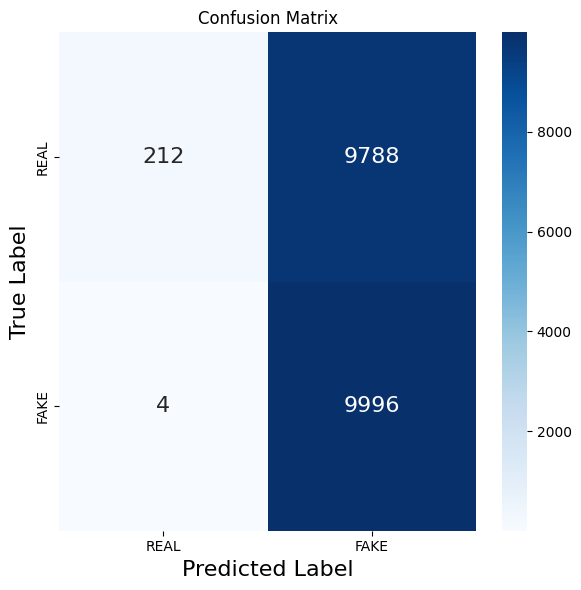

In [5]:
#Sacar algún modelo en particular
test_loader = p.get_test_loader(data_dir, batch_size=batch_size, img_size=img_size)

models = [("Resultados/Models/Model1_B3C_3_NO.pth", "B3C")]
#Elegimos dispositivo (Como es test se puede hacer en cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for model_path, model_class in models:
    #Creamos el modelo con la arquitectura correspondiente dependiendo del modelo a testear 
    model = t.load_model(model_path, model_class, out_1, out_2, out_3, out_4, img_size)
    #Obtenemos las métricas y la matriz de confusión y las guardamos
    metrics = t.evaluate_model_roc(model, test_loader, device, model_path)
    print(f"Resultados para {model_path}: {metrics} con umbral de 0.5")

In [3]:
#Sacar Curva Roc Tres modelos
test_loader = p.get_test_loader(data_dir, batch_size=batch_size, img_size=img_size)

#Elegimos dispositivo (Como es test se puede hacer en cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_3C_path = "Resultados/Models/Model1_3C_3_NO.pth"
model_3C_class = "3C"
model_4C_path = "Resultados/Models/Model1_4C_2_DA.pth"
model_4C_class = "4C"
model_B3C_path = "Resultados/Models/Model1_B3C_3_NO.pth"
model_B3C_class = "B3C"

model_3C = t.load_model(model_3C_path, model_3C_class, out_1, out_2, out_3, out_4, img_size)
model_4C = t.load_model(model_4C_path, model_4C_class, out_1, out_2, out_3, out_4, img_size)
model_B3C = t.load_model(model_B3C_path, model_B3C_class, out_1, out_2, out_3, out_4, img_size)

t.evaluate_model_roc_three(model_3C, model_4C, model_B3C, test_loader, device) 


Grafica ROC guardada en ./Test/ROC_ALL_MODELS.svg
